In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib
from scipy import constants
import sympy
import SchemDraw as schem
import SchemDraw.elements as e

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
#from mayavi import mlab
%matplotlib inline

In [2]:
big_junction_side_a = 355e-9
big_junction_side_b = 200e-9
critical_current_density = 4e6
junction_permittivity = 11
vacuum_permittivity = constants.epsilon_0
junction_thickness = 2.0e-9
junction_capacitance = vacuum_permittivity*junction_permittivity*big_junction_side_a*big_junction_side_b/junction_thickness
#capacitance_density = 
flux_quantum = constants.h/(2*constants.e)
critical_current = critical_current_density*big_junction_side_a*big_junction_side_b
josephson_energy = critical_current*flux_quantum/constants.h/(2*np.pi)
wire_distance = junction_capacitance / constants.epsilon_0 / np.sqrt(12.45)
#capacitance_density = 
charging_energy = constants.e**2/(2*junction_capacitance)/constants.h
print ('critical current: {0:7.4g} A, Josephson energy: {1:7.4g} Hz'.format(critical_current, josephson_energy))
print ('junction capacitance: {0:7.4g}'.format(junction_capacitance))
print ('corresponding wire distance: {0:7.4g}'.format(wire_distance))
print ('charging energy: {0:7.4g} Hz'.format(constants.e**2/(2*junction_capacitance)/constants.h))
print ('plasma frequency: {0:7.4g} Hz'.format(np.sqrt(8*charging_energy*josephson_energy)))

critical current: 2.84e-07 A, Josephson energy: 1.411e+11 Hz
junction capacitance: 3.458e-15
corresponding wire distance: 0.0001107
charging energy: 5.602e+09 Hz
plasma frequency: 7.951e+10 Hz


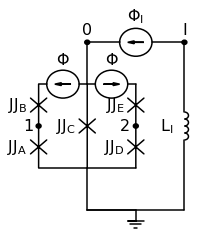

In [3]:
d = schem.Drawing()

d.add(e.GND)
d.add(e.LINE, d='left', l=d.unit/2)
d.add(e.LINE, d='up', l=d.unit/2)
d.add(e.LINE, d='left', l=d.unit/2)
d.add(e.JJ,d='up', label='$JJ_A$', l=d.unit/2)
d.add(e.DOT, d='up',label='1')
d.add(e.JJ,d='up', label='$JJ_B$', l=d.unit/2)
#d.add(e.LINE, d='right', l=d.unit/2)
d.add(e.SOURCE_I, d='right', l=d.unit/2, label='$\\Phi$')
d.add(e.JJ,d='down', label='$JJ_C$', l=d.unit)
d.add(e.LINE, d='right', l=d.unit/2)
d.add(e.JJ,d='up', label='$JJ_D$', l=d.unit/2)
d.add(e.DOT, d='up',label='2')
d.add(e.JJ,d='up', label='$JJ_E$', l=d.unit/2)
d.add(e.SOURCE_I, d='left', l=d.unit/2, label='$\\Phi$')
#d.add(e.LINE, d='left', l=d.unit/2)
d.add(e.LINE, d='up', l=d.unit/2)
d.add(e.DOT, label='0')
d.add(e.SOURCE_I, d='right', label='$\\Phi_I$')
d.add(e.DOT, label='I')
#d.add(e.LINE, d='right', l=d.unit)
d.add(e.INDUCTOR, d='down', label='$L_I$', l=d.unit*2)
d.add(e.LINE, d='left', l=d.unit)
d.draw()

In [4]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '0'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['2', '4'])
FQ3JJ.add_element(QInductance('LI'), ['GND', 'I'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '3'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '0'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '2'])
FQ3JJ.add_element(QCapacitance('CE'), ['2', '4'])
#FQ3JJ.add_element(QLagrangianCurrentSource('I'), ['GND', '0'])
        
phi0 = QVariable('\phi_0')
phi1 = QVariable('\phi_1')
phi2 = QVariable('\phi_2')
phie = QVariable('\phi')
phii = QVariable('\phi_I')
#phix2 = QVariable('φx2')
phi0.create_grid(24, 2, centre=0)
phi1.create_grid(24, 2, centre=0)
phi2.create_grid(24, 2, centre=0)
FQ3JJ.add_variable(phi0)
FQ3JJ.add_variable(phi1)
FQ3JJ.add_variable(phi2)
FQ3JJ.add_variable(phie)
FQ3JJ.add_variable(phii)

FQ3JJ.map_nodes_linear(['GND', '0', '1', '2', '3', '4', 'I'], 
                       ['\phi_0', '\phi_1', '\phi_2', '\phi', '\phi_I'], 
                       np.asarray([[0,0,0,0,0], 
                                   [1,0,0,0,0], 
                                   [0,1,0,0,0], 
                                   [0,0,1,0,0], 
                                   [1,0,0,1,0], 
                                   [1,0,0,-1,0],
                                   [1,0,0,0,1]], dtype=int))

#FQ3JJ.map_nodes_linear(['GND', '0', '1', '2', '3', '4'], 
#                       ['\phi_0', '\phi_1', '\phi_2', '\phi'], 
#                       np.asarray([[0,0,0,0], 
#                                   [1,0,0,0], 
#                                   [0,1,0,0], 
#                                   [0,0,1,0], 
#                                   [1,0,0,1], 
#                                   [1,0,0,-1]], dtype=int))

TypeError: create_grid() got an unexpected keyword argument 'centre'

# Qubit Lagrange function

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)


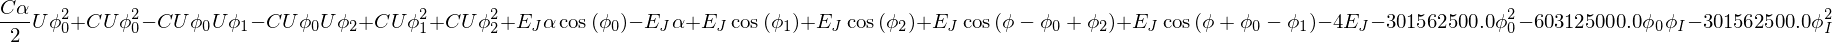

In [142]:
alpha = sympy.Symbol('\\alpha')
Ej = sympy.Symbol('E_J')
C = sympy.Symbol('C')
I = sympy.Symbol('I')
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(C)
FQ3JJ.find_element('CB').set_capacitance(C)
FQ3JJ.find_element('CD').set_capacitance(C)
FQ3JJ.find_element('CE').set_capacitance(C)
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(alpha*C)
#FQ3JJ.find_element('I').set_current(I)
#FQ3JJ.find_element('LI').set_inductance(1/(2*Ej*4))
phie.set_parameter(np.pi, 0)
#phii.set_parameter(0, 0)
sympy.init_session(quiet=True)
symbolic_lagrangian = sympy.expand(FQ3JJ.symbolic_lagrangian()).subs(sympy.Symbol('U\phi'), 0)
symbolic_lagrangian
#print((FQ3JJ.linear_coordinate_transform.T*FQ3JJ.capacitance_matrix(symbolic=True)*FQ3JJ.linear_coordinate_transform).inv())

#Classical stable state

In [39]:
eq0 = sympy.diff(symbolic_lagrangian, sympy.Symbol('\phi_0'))
eq1 = sympy.diff(symbolic_lagrangian, sympy.Symbol('\phi_1'))
eq2 = sympy.diff(symbolic_lagrangian, sympy.Symbol('\phi_2'))
(eq0, eq1, eq2)

# Circuit Capacitance Matrix

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)


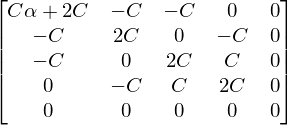

In [6]:
sympy.init_session(quiet=True)
FQ3JJ.capacitance_matrix_variables(symbolic=True)

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)


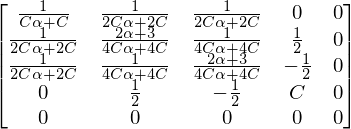

In [8]:
sympy.init_session(quiet=True)
sympy.Matrix([sympy.ratsimp(x) for x in FQ3JJ.capacitance_matrix_legendre_transform(symbolic=True)]).reshape(5,5)

# Qubit Hamilton function

In [ ]:
sympy.ratsimp(sympy.expand(sympy.ratsimp(FQ3JJ.symbolic_hamiltonian())))

In [13]:
#EjEc_ratio = 80
alpha = 0.72
flux_steps = 129
energy_levels = 3
current_steps = 3
energies = np.zeros((flux_steps,current_steps,energy_levels), dtype=np.float)
phase_operators = np.zeros((5, flux_steps,current_steps,energy_levels), dtype=np.complex)
sin_phase_operators = np.zeros((5, flux_steps,current_steps,energy_levels), dtype=np.complex)
#energies = np.zeros((flux_steps,8), dtype=np.float)

Ej = 38.6e9#josephson_energy#355e9#josephson_energy#200e9#38.6e9
Ec = 2*1.6e-19**2/junction_capacitance/(2*np.pi*1.054e-34)/1.5
#print(Ec/1e9)
#alpha=1.065
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))

#FQ3JJ.find_element('LI').set_inductance(1/(2*Ej*8*2*np.pi))
FQ3JJ.find_element('LI').set_inductance(8*1024./(2*Ej))
phi_range = np.linspace(-np.pi, np.pi, flux_steps)
#current_step_A = Ej*(2+alpha)*0.001
current_step_A = 0.01
current_range = np.linspace(-current_step_A, current_step_A, current_steps)
phi0.create_grid(16, 1, centre=np.pi)
phi1.create_grid(16, 1, centre=0)
phi2.create_grid(16, 1, centre=0)

for phie_id, phie_value in enumerate(phi_range):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    #for current_id, current_value in enumerate(current_range):
    for current_id, current_value in enumerate(current_range):
        #FQ3JJ.find_element('I').set_current(current_value)
        phie.set_parameter(phie_value, 0)
        phii.set_parameter(current_value, 0)
        #phix2.set_parameter(phix2_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=energy_levels, maxiter=3000)
        sum_axes= tuple([i for i in range(1, len(FQ3JJ.create_phase_grid()[0].shape)+1)])
        phase_operators[:,phie_id,current_id,:] = np.sum(np.reshape(FQ3JJ.create_phase_grid(), \
                        (5,)+FQ3JJ.create_phase_grid()[0].shape+(1,))*eigenfunctions*np.conj(eigenfunctions), \
                                                          axis=sum_axes)
        sin_phase_operators[:,phie_id,current_id,:] = np.sum(np.reshape(np.sin(FQ3JJ.create_phase_grid()), \
                        (5,)+FQ3JJ.create_phase_grid()[0].shape+(1,))*eigenfunctions*np.conj(eigenfunctions), \
                                                          axis=sum_axes)
        #sin_phase_operators[:,phie_id,current_id,:,:] = \
        #np.einsum('i...,...j,...k->ijk', np.sin(FQ3JJ.create_phase_grid()), eigenfunctions, np.conj(eigenfunctions))
    #energies[phix1_id, phix2_id, :] = eigenenergies
        energies[phie_id,current_id,:] = eigenenergies
        print('\rφx1_id: {0}, current_id: {1}'.format(phie_id, current_id), (eigenenergies[:]-eigenenergies[0]).real, \
             'ground state φ0, sin φ0 expectation value:', np.real(phase_operators[0,phie_id,current_id,0]), \
              np.real(sin_phase_operators[0,phie_id,current_id,0]))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


φx1_id: 0, current_id: 0 [  0.00000000e+00   1.37021124e+10   2.91115267e+10] ground state φ0, sin φ0 expectation value: 3.1386559531791764 0.002012021200724412
φx1_id: 0, current_id: 1 [  0.00000000e+00   1.37021123e+10   2.91115250e+10] ground state φ0, sin φ0 expectation value: 3.1386472946390533 0.0020184461287800493
φx1_id: 0, current_id: 2 [  0.00000000e+00   1.37021121e+10   2.91115233e+10] ground state φ0, sin φ0 expectation value: 3.138638636098289 0.0020248710568963046
φx1_id: 1, current_id: 0 [  0.00000000e+00   1.36953798e+10   2.90984387e+10] ground state φ0, sin φ0 expectation value: 3.1386525336540325 0.0020137059458597006
φx1_id: 1, current_id: 1 [  0.00000000e+00   1.36953797e+10   2.90984370e+10] ground state φ0, sin φ0 expectation value: 3.1386438667859515 0.0020201362538647682
φx1_id: 1, current_id: 2 [  0.00000000e+00   1.36953796e+10   2.90984352e+10] ground state φ0, sin φ0 expectation value: 3.1386351999172435 0.0020265665618934836
φx1_id: 2, current_id: 0 [  0.

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


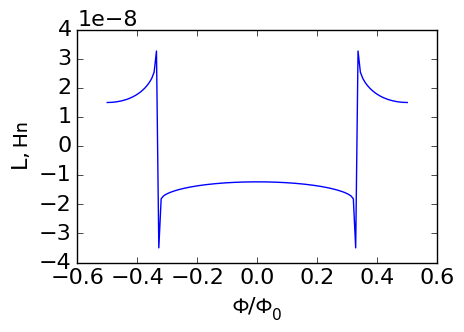

In [14]:
current = (alpha*sin_phase_operators[0,:,:,:]+sin_phase_operators[1,:,:,:]+sin_phase_operators[2,:,:,:])*Ej*(2*np.pi)*constants.h/\
        (constants.h/(2*constants.e))
diff_phase = (phase_operators[0,:,2,:]-phase_operators[0,:,1,:])
inductance_full = (diff_phase*constants.h/(2*constants.e*2*np.pi))/(current[:,2,:]-current[:,1,:])
inductance_shunt = FQ3JJ.find_element('LI').get_inductance()*(constants.h/(2*constants.e*2*np.pi))**2/constants.h
inductance_qubit_series = inductance_full-inductance_shunt
inductance_qubit_parallel = 1/(1/inductance_full + 1/inductance_shunt)
#plt.plot(phi_range/(2*np.pi), inductance_full)
#plt.plot(phi_range/(2*np.pi), inductance_qubit_series[:,0])
#plt.plot(phi_range/(2*np.pi), inductance_qubit_parallel[:,0])
plt.figure(figsize=(4,3))
plt.plot(phi_range/(2*np.pi), inductance_full[:,0])

#FQ3JJ.find_element('LI').get_inductance()/constants.h*(constants.h/(2*constants.e*2*np.pi))**2
#plt.ylim([0,1e-8])
plt.ylabel('$L, \mathrm{Hn}$')
plt.xlabel('$\\Phi/\\Phi_0$')

In [168]:
%matplotlib inline
flux_step = current_step_A
energies[:,1,1] = np.mean(energies[:,1,0:2], axis=1)
energies[:,2,1] = energies[:,2,0]
inductance = 1/(np.diff(np.diff(energies, axis=1), axis=1)/(flux_step)**2)
inductance_qubit = inductance_full - FQ3JJ.find_element('LI').get_inductance()
inductance_full_henries = inductance_full/constants.h*((constants.h/(2*constants.e*2*np.pi)))**2
inductance_qubit_henries = inductance_qubit/constants.h*((constants.h/(2*constants.e*2*np.pi)))**2

In [166]:
np.diff(np.diff(energies[:,:,:], axis=1), axis=1)[:,0,:]

array([[ -3.56802754e+07,   1.35866900e+05,  -3.45447267e+07],
       [ -3.56769826e+07,   1.36592387e+05,  -3.45244915e+07],
       [ -3.56669970e+07,   1.38813117e+05,  -3.44625117e+07],
       [ -3.56499857e+07,   1.42666968e+05,  -3.43548134e+07],
       [ -3.56253571e+07,   1.48401639e+05,  -3.41942395e+07],
       [ -3.55921980e+07,   1.56404983e+05,  -3.39695458e+07],
       [ -3.55491703e+07,   1.67255309e+05,  -3.36639041e+07],
       [ -3.54943472e+07,   1.81802311e+05,  -3.32525156e+07],
       [ -3.54249508e+07,   2.01297026e+05,  -3.26988442e+07],
       [ -3.53369311e+07,   2.27603727e+05,  -3.19486967e+07],
       [ -3.52242695e+07,   2.63553917e+05,  -3.09210180e+07],
       [ -3.50777970e+07,   3.13556025e+05,  -2.94941375e+07],
       [ -3.48831170e+07,   3.84685898e+05,  -2.74877056e+07],
       [ -3.46168033e+07,   4.88726915e+05,  -2.46492621e+07],
       [ -3.42391123e+07,   6.46201171e+05,  -2.06876367e+07],
       [ -3.36792298e+07,   8.94893690e+05,  -1.5476265

In [98]:
import pandas as pd
pd.DataFrame(phi_range/(2*np.pi), np.sum(inductance_centre[:,0,0:2], axis=1)/2*constants.h).to_csv('cats_ears_qubits_inductance_inductor.csv')
#pd.DataFrame(phi_range/(2*np.pi), -inductance_side[:,0,0]*constants.h).to_csv('cats_ears_qubits_inductance_side.csv')

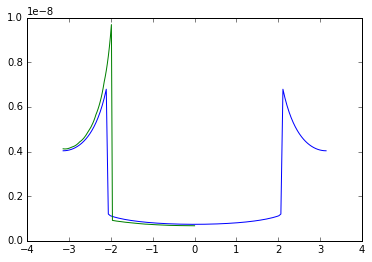

In [208]:
#plt.plot(phi_range, -inductance_centre[:,0,0]*constants.h)
#plt.plot(phi_range, -inductance_side[:,0,0]*constants.h)
plt.plot(phi_range,inductance[:,0]*constants.h)
plt.plot(phi_range/2-np.pi/2, L_kin)
plt.ylim([0, 1e-8])

(-1e-08, 1e-08)

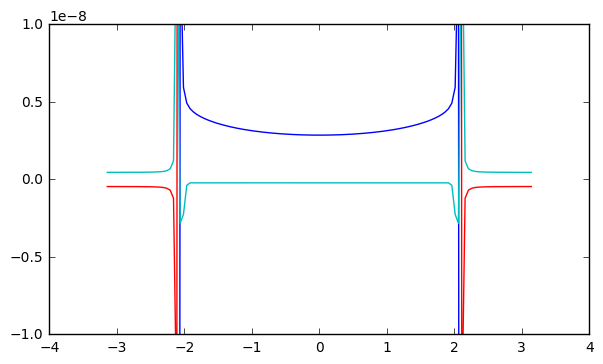

In [172]:
#plt.plot(phi_range, -inductance_centre[:,0,0]*constants.h)
#plt.plot(phi_range, -inductance_side[:,0,0]*constants.h)
plt.plot(phi_range,inductance_qubit_henries[:,0,0:2])
plt.plot(phi_range,inductance_full_henries[:,0,0:2])
#plt.plot(phi_range/2-np.pi/2, L_kin)
plt.ylim([-1e-8, 1e-8])

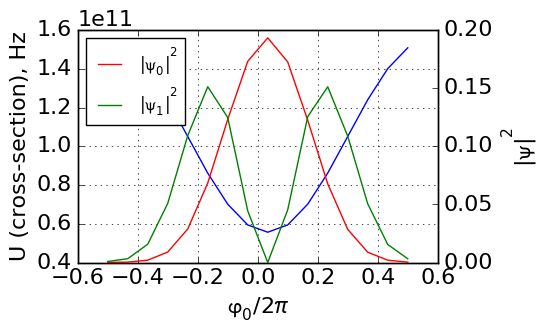

In [15]:
#plt.figure(figsize=(4,3))
fig, ax = plt.subplots(figsize=(4,3))
#ax.plot(np.linspace(-3, 3, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,0,0].ravel())
#ax.plot(np.linspace(-3, 3, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,5,5].ravel())
#ax.plot(np.linspace(-3, 3, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,3,9].ravel())
#ax.plot(np.linspace(-4, 4, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,9,9].ravel())
ax.plot(np.linspace(-0.5, 0.5, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,8,8].ravel())
#ax.plot(np.linspace(-4, 4, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,7,7].ravel())
#ax.plot(np.linspace(-4, 4, FQ3JJ.phase_potential[:,0,0].size), (FQ3JJ.phase_potential[:,8,8].ravel()+FQ3JJ.phase_potential[:,9,9].ravel())/2)
#ax.plot(np.linspace(-3, 3, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,3,3].ravel())
#ax.plot(np.linspace(-3, 3, FQ3JJ.phase_potential[:,0,0].size), FQ3JJ.phase_potential[:,2,2].ravel())
profiles = np.sum(np.abs(eigenfunctions)**2, axis=tuple([i for i in range(1, len(eigenfunctions.shape)-1)]))
plt.ylabel('U (cross-section), Hz')
plt.xlabel('$\\varphi_0/2\pi$')
plt.grid()
ax2 = ax.twinx()
plt.ylabel('$|\\psi|^2$')
ax2.plot(np.linspace(-0.5, 0.5, FQ3JJ.phase_potential[:,6,6].size), profiles[:,0], color='r', label='$|\\psi_0|^2$')
ax2.plot(np.linspace(-0.5, 0.5, FQ3JJ.phase_potential[:,6,6].size), profiles[:,1], color='g', label='$|\\psi_1|^2$')
plt.legend(loc='upper left', fontsize=12)

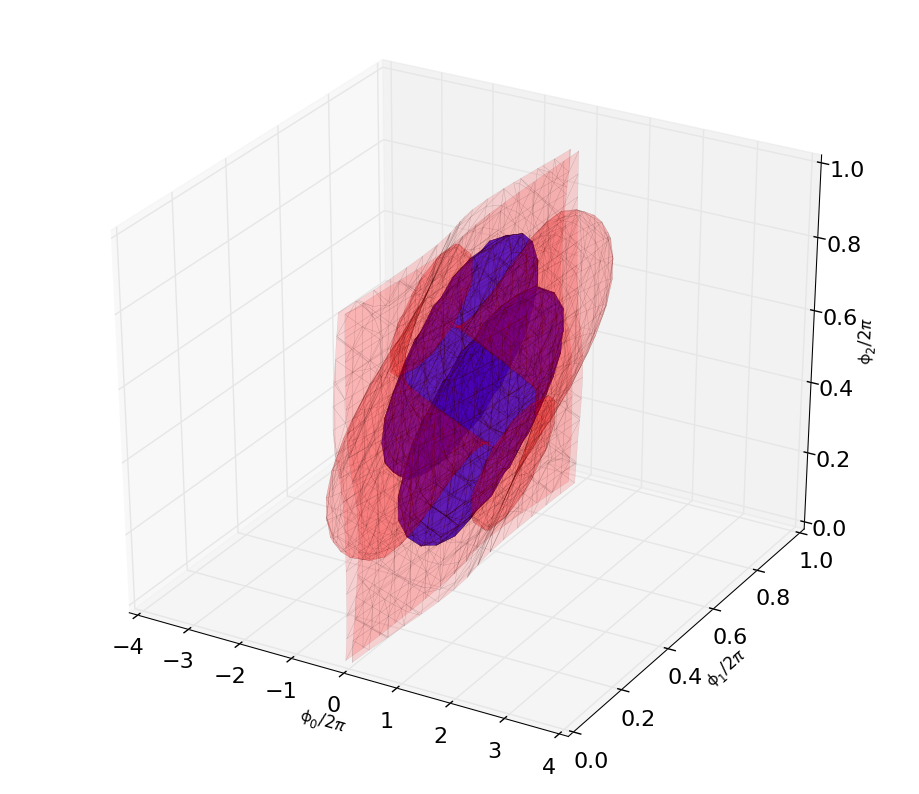

In [89]:
def isosurface(data, level, color, alpha):
    #data = np.fft.fftshift(np.fft.fftshift(data, axes=1), axes=2)
    #data = np.fft.fftshift(data)
    verts, faces = measure.marching_cubes(np.reshape(data,(16*6,16,16)), level, \
    spacing=((phi0.get_phase_grid()[1]-phi0.get_phase_grid()[0])/(2*np.pi), \
             (phi1.get_phase_grid()[1]-phi1.get_phase_grid()[0])/(2*np.pi), \
             (phi2.get_phase_grid()[1]-phi2.get_phase_grid()[0])/(2*np.pi)))
    verts[:,0] -= 3
    mesh = Poly3DCollection(verts[faces], facecolor=color, linewidths=0.2, alpha=alpha)
    ax.add_collection3d(mesh)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
isosurface(np.abs(eigenfunctions[..., 0, 1])**2, np.mean(np.abs(eigenfunctions[..., 0, 1])**2)*5, color='blue', alpha=0.6)
#isosurface(np.abs(eigenfunctions[..., 0, 0])**2, np.mean(np.abs(eigenfunctions[..., 0, 0])**2)*10, color='blue', alpha=0.2)
isosurface(FQ3JJ.phase_potential, np.mean(FQ3JJ.phase_potential)/2, color='red', alpha=0.15)
#isosurface(FQ3JJ.phase_potential, np.mean(FQ3JJ.phase_potential)/2, color='red', alpha=0.15)
#isosurface(FQ3JJ.phase_potential, np.mean(FQ3JJ.phase_potential)/2.3, color='red', alpha=0.15)
#isosurface(FQ3JJ.phase_potential, np.mean(FQ3JJ.phase_potential)/1.35, color='red', alpha=0.15)
# Fancy indexing: `verts[faces]` to generate a collection of triangles
ax.set_xlim(-4, 4)  # a = 6 (times two for 2nd ellipsoid)
#ax.set_xlim(0, 1)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 1)  # b = 10
ax.set_zlim(0, 1)  # c = 16
ax.set_xlabel('$\phi_0/2\pi$', fontsize=12)
ax.set_ylabel('$\phi_1/2\pi$', fontsize=12)
ax.set_zlabel('$\phi_2/2\pi$', fontsize=12)

In [61]:
def isosurface(data, level, color, alpha):
    data = np.fft.fftshift(data, axes=0)
    verts, faces = measure.marching_cubes(np.reshape(data,(24,24,24)), level, \
    spacing=((phi0.get_phase_grid()[1]-phi0.get_phase_grid()[0])/(2*np.pi), \
             (phi1.get_phase_grid()[1]-phi1.get_phase_grid()[0])/(2*np.pi), \
             (phi2.get_phase_grid()[1]-phi2.get_phase_grid()[0])/(2*np.pi)))
    verts[:,0] -= 0.5
    mesh = Poly3DCollection(verts[faces], facecolor=color, linewidths=0.2, alpha=alpha)
    ax.add_collection3d(mesh)
    
    # Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#isosurface(np.abs(eigenfunctions[..., 0, 3])**2, np.mean(np.abs(eigenfunctions[..., 0, 3])**2)*30, color='blue', alpha=0.6)
#isosurface(np.abs(eigenfunctions[..., 0, 0])**2, np.mean(np.abs(eigenfunctions[..., 0, 0])**2)*10, color='blue', alpha=0.2)
v1 = np.mean(FQ3JJ.phase_potential)/2
v2 = np.mean(FQ3JJ.phase_potential)/1.35
#v3 = np.mean(FQ3JJ.phase_potential)/1.1
#v3 = np.mean(FQ3JJ.phase_potential)/1.2
vmax = np.max(FQ3JJ.phase_potential)
isosurface(FQ3JJ.phase_potential, v1, color=cm.jet(v1/vmax), alpha=0.1)
#isosurface(FQ3JJ.phase_potential, v2, color=cm.jet(v2/vmax), alpha=0.1)
isosurface(FQ3JJ.phase_potential, v2, color=cm.jet(v2/vmax), alpha=0.1)
#isosurface(FQ3JJ.phase_potential, v3, color=cm.jet(v3/vmax), alpha=0.1)
# Fancy indexing: `verts[faces]` to generate a collection of triangles
ax.set_xlim(-0.5, 0.5)  # a = 6 (times two for 2nd ellipsoid)
#ax.set_xlim(0, 1)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 1)  # b = 10
ax.set_zlim(0, 1)  # c = 16
ax.set_xlabel('$\phi_0/2\pi$', fontsize=12)
ax.set_ylabel('$\phi_1/2\pi$', fontsize=12)
ax.set_zlabel('$\phi_2/2\pi$', fontsize=12)

shifted_potential = np.fft.fftshift(FQ3JJ.phase_potential, axes=0)

# plotting cross-sections
[x,y] = np.meshgrid(np.linspace(-0.5, 0.5, 24, endpoint=False), np.linspace(0, 1, 24, endpoint=False))
z = np.zeros(x.shape)+0.5
values = np.reshape(shifted_potential[:,:,11], (24,24))/vmax
colors = cm.jet(values)
#colors[:,:,3]=0.5
ax.plot_surface(x,y,z,rstride=1, cstride=1, facecolors=colors, alpha=0.5)

#[x,y] = np.meshgrid(np.linspace(-0.5, 0.5, 24, endpoint=False), np.linspace(0, 1, 24, endpoint=False))
#z = np.zeros(x.shape)+0.5
#values = np.reshape(shifted_potential[:,:,11], (24,24))/vmax
#colors = cm.jet(values)
#colors[:,:,3]=0.5
#ax.plot_surface(x,y,z,rstride=1, cstride=1, facecolors=colors, alpha=0.5)

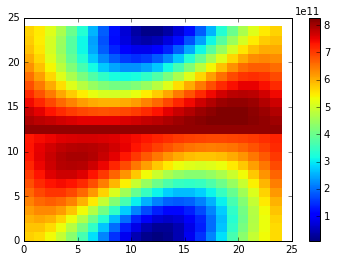

In [65]:
plt.pcolor(np.reshape(shifted_potential, (24,24,24))[:,:,11]); plt.colorbar()


In [48]:
#EjEc_ratio = 80
#alpha = 0.72
flux_steps = 129
alpha_steps = 129
energies = np.zeros((flux_steps,alpha_steps,3), dtype=np.float)
#energies = np.zeros((flux_steps,8), dtype=np.float)

Ej = josephson_energy#355e9#josephson_energy#200e9#38.6e9
Ec = 2*1.6e-19**2/junction_capacitance/(2*np.pi*1.054e-34)
#print(Ec/1e9)
#alpha=1.065
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))
#FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
#FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))
#phi_range = np.linspace(-np.pi, 0, flux_steps)
#phi_range = [-np.pi]
alpha_range = np.linspace(0.01, 1.6, alpha_steps)
phi_range = np.linspace(-np.pi*0.995, -np.pi*0.005, alpha_steps)
for phie_id, phie_value in enumerate(phi_range):
    for alpha_id, alpha_value in enumerate(alpha_range):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
        FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha_value)
        FQ3JJ.find_element('CC').set_capacitance(alpha_value/(2*Ec))
        phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=3, maxiter=100000)
        #energies[phix1_id, phix2_id, :] = eigenenergies
        energies[phie_id, alpha_id, :] = eigenenergies
        print('φx1_id: {0} ({1:6.3g}), alpha_id: {2} ({3:6.3g})'.format(phie_id, phie_value, alpha_id, alpha_value), (eigenenergies[:]-eigenenergies[0]).real)

φx1_id: 0 ( -3.13), alpha_id: 0 (  0.01) [  0.00000000e+00   7.43019366e+10   7.50557411e+10]
φx1_id: 0 ( -3.13), alpha_id: 1 (0.0224) [  0.00000000e+00   7.34023856e+10   7.50550684e+10]
φx1_id: 0 ( -3.13), alpha_id: 2 (0.0348) [  0.00000000e+00   7.25129106e+10   7.50541555e+10]
φx1_id: 0 ( -3.13), alpha_id: 3 (0.0473) [  0.00000000e+00   7.16335305e+10   7.50530018e+10]
φx1_id: 0 ( -3.13), alpha_id: 4 (0.0597) [  0.00000000e+00   7.07639668e+10   7.50516066e+10]
φx1_id: 0 ( -3.13), alpha_id: 5 (0.0721) [  0.00000000e+00   6.99039074e+10   7.50499688e+10]
φx1_id: 0 ( -3.13), alpha_id: 6 (0.0845) [  0.00000000e+00   6.90530397e+10   7.50480870e+10]
φx1_id: 0 ( -3.13), alpha_id: 7 ( 0.097) [  0.00000000e+00   6.82110574e+10   7.50459593e+10]
φx1_id: 0 ( -3.13), alpha_id: 8 ( 0.109) [  0.00000000e+00   6.73776626e+10   7.50435839e+10]
φx1_id: 0 ( -3.13), alpha_id: 9 ( 0.122) [  0.00000000e+00   6.65525664e+10   7.50409582e+10]
φx1_id: 0 ( -3.13), alpha_id: 10 ( 0.134) [  0.00000000e+00 

C:\Users\ilia\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


# Classical stability diagram

In [49]:
boundary_zero_bi = lambda x: (np.sin(x/2)**2/(2*np.cos(x/2)))
boundary_zero_pi = lambda x: 2*(np.sin(x/2)-np.cos(x/2))
boundary_bi_pi = lambda x: np.sin(x/2)
triple_point = np.arccos(1/np.sqrt(5))*2

In [ ]:
1

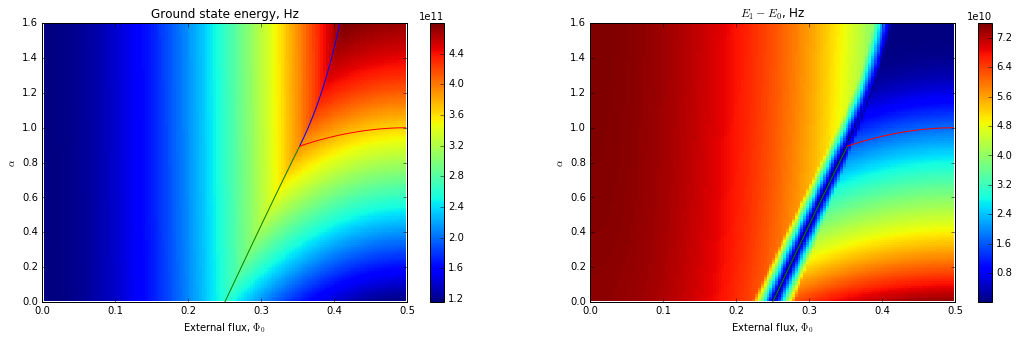

In [64]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
phi_range_flipped = -np.flipud(phi_range)
phi_range_flipped_left = phi_range_flipped[phi_range_flipped<triple_point]
phi_range_flipped_right = phi_range_flipped[phi_range_flipped>triple_point]
phi_range_flipped_left[-1] =triple_point
phi_range_flipped_right[0] =triple_point
phi_range_flipped_2pi = phi_range_flipped/(2*np.pi)
phi_range_flipped_left_2pi = np.asarray(phi_range_flipped_left)/(2*np.pi)
phi_range_flipped_right_2pi = np.asarray(phi_range_flipped_right)/(2*np.pi)
plt.pcolor(phi_range_flipped_2pi, alpha_range,np.fliplr(energies[:,:,0].T))
plt.colorbar()
plt.plot(phi_range_flipped_right_2pi, boundary_zero_bi(phi_range_flipped_right))
plt.plot(phi_range_flipped_left_2pi, boundary_zero_pi(phi_range_flipped_left))
plt.plot(phi_range_flipped_right_2pi, boundary_bi_pi(phi_range_flipped_right))
plt.xlabel('External flux, $\\Phi_0$')
plt.ylabel('$\\alpha$')
plt.title('Ground state energy, Hz')
plt.xlim([0, 0.5])
plt.ylim([0, 1.6])
#print (triple_point)
plt.subplot(1,2,2)
plt.pcolor(phi_range_flipped_2pi, alpha_range,np.fliplr(energies[:,:,1].T-energies[:,:,0].T))
plt.plot(phi_range_flipped_right_2pi, boundary_zero_bi(phi_range_flipped_right))
plt.plot(phi_range_flipped_left_2pi, boundary_zero_pi(phi_range_flipped_left))
plt.plot(phi_range_flipped_right_2pi, boundary_bi_pi(phi_range_flipped_right))
plt.colorbar()
plt.xlabel('External flux, $\\Phi_0$')
plt.ylabel('$\\alpha$')
plt.title('$E_1-E_0$, Hz')
plt.xlim([0, 0.5])
plt.ylim([0, 1.6])

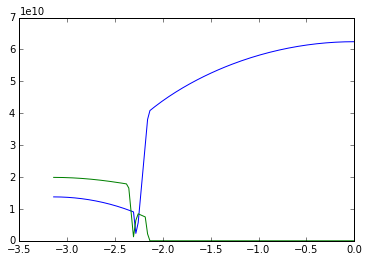

In [12]:
plt.figure()

plt.plot(phi_range, energies[:,1]-energies[:,0])
plt.plot(phi_range, energies[:,2]-energies[:,1])

In [78]:
%matplotlib qt4

379


C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(self.vmin)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:964: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(self.vmax)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:943: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(vmin)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:944: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(vmax)


C:\Users\ilia\Anaconda3\lib\site-packages\numpy\ma\core.py:3095: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


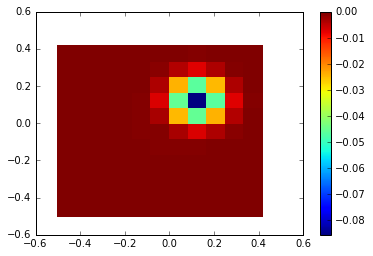

In [114]:
%matplotlib inline
print(np.argmin(FQ3JJ.phase_potential))
plt.pcolor(FQ3JJ.variables[1].phase_grid/(2*np.pi), FQ3JJ.variables[2].phase_grid/(2*np.pi), \
           np.reshape(eigenfunctions[2,:,:,0,1], (12,12))); plt.colorbar()

In [141]:
flux_steps = 129
phi_min = np.zeros((flux_steps, 4), dtype=np.float)
#EjEc_ratio = 80
alpha = 0.72

Ej = 38.6e9#josephson_energy#38.6e9
Ec = 2*1.6e-19**2/junction_capacitance/(2*np.pi*1.054e-34)/1.5
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))

phi_range = np.linspace(-np.pi, 0, flux_steps)

phi0.create_grid(64, 1)
phi1.create_grid(64, 1)
phi2.create_grid(64, 1)


for phie_id, phie_value in enumerate(phi_range):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
    FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))        
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    min_cell = np.argmin(FQ3JJ.phase_potential)
    phi_min[phie_id, :] = np.reshape(np.asarray(FQ3JJ.create_phase_grid()), (4,np.prod(FQ3JJ.grid_shape())))[:, min_cell]

ValueError: total size of new array must be unchanged

In [132]:
phi_min

array([[ 3.04341788, -0.09817477, -0.09817477, -3.14159265],
       [ 3.04341788,  0.        , -0.09817477, -3.11704896],
       [ 3.04341788,  0.        , -0.09817477, -3.09250527],
       [ 3.04341788,  0.        , -0.09817477, -3.06796158],
       [ 3.04341788,  0.        , -0.09817477, -3.04341788],
       [ 3.04341788,  0.        , -0.09817477, -3.01887419],
       [ 3.04341788,  0.        , -0.09817477, -2.9943305 ],
       [ 3.04341788,  0.        , -0.09817477, -2.96978681],
       [ 3.04341788,  0.        , -0.19634954, -2.94524311],
       [ 3.04341788,  0.09817477, -0.19634954, -2.92069942],
       [ 3.04341788,  0.09817477, -0.19634954, -2.89615573],
       [ 3.04341788,  0.09817477, -0.19634954, -2.87161203],
       [ 3.04341788,  0.09817477, -0.19634954, -2.84706834],
       [ 3.04341788,  0.09817477, -0.19634954, -2.82252465],
       [ 3.04341788,  0.09817477, -0.19634954, -2.79798096],
       [ 3.04341788,  0.09817477, -0.19634954, -2.77343726],
       [ 3.04341788,  0.

In [133]:
L = np.zeros((flux_steps, 5))
L[:, 0] = flux_quantum/(critical_current*2*np.pi*np.cos(phi_min[:, 0])*alpha)
L[:, 1] = flux_quantum/(critical_current*2*np.pi*np.cos(phi_min[:, 1]))
L[:, 2] = flux_quantum/(critical_current*2*np.pi*np.cos(phi_min[:, 2]))
L[:, 3] = flux_quantum/(critical_current*2*np.pi*np.cos(phi_min[:, 3]-phi_min[:, 1]+phi_min[:,0]))
L[:, 4] = flux_quantum/(critical_current*2*np.pi*np.cos(phi_min[:, 3]+phi_min[:, 2]-phi_min[:,0]))

In [134]:
flux_quantum/critical_current

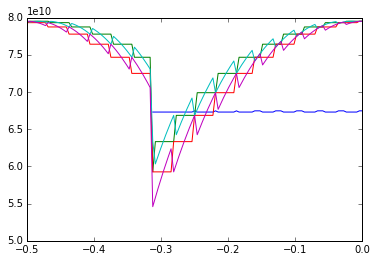

In [135]:
plt.plot(phi_range/(2*np.pi), 1/np.sqrt(L*junction_capacitance)/(2*np.pi))

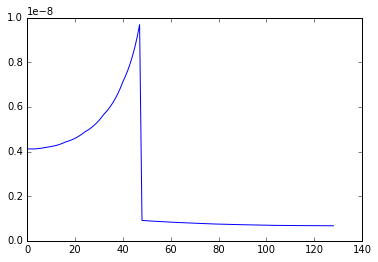

In [162]:
omega = np.linspace(2e9, 20e9, 128)*2*np.pi
[phi_m, omega_m] = np.meshgrid(phi_range, omega)
Z0 = 1j*omega_m*L[:,0]/(1-omega_m**2*L[:,0]*alpha*junction_capacitance)
Z1 = 1j*omega_m*L[:,1]/(1-omega_m**2*L[:,1]*junction_capacitance)
Z2 = 1j*omega_m*L[:,2]/(1-omega_m**2*L[:,2]*junction_capacitance)
Z3 = 1j*omega_m*L[:,3]/(1-omega_m**2*L[:,3]*junction_capacitance)
Z4 = 1j*omega_m*L[:,4]/(1-omega_m**2*L[:,4]*junction_capacitance)

Z_kin = 1/(1/Z0+1/(Z1+Z3)+1/(Z2+Z4)+1/1000) # with resonances
Z_ind = 1.3e-6*10e-6*1j*omega_m
Z = Z_kin + Z_ind

L_kin = 1/(1/L[:,0] +1/(L[:,1]+L[:,3])+1/(L[:,2]+L[:,4])) # without resonances
L_kin_nores = L_kin/10e-6
C_ind = 14.3e-15/140e-6
Z_metamaterial = L_kin_nores/C_ind
v_metamaterial = np.sqrt(1/(L_kin_nores*C_ind))
wavelength = v_metamaterial/(omega_m/2*np.pi)
#print (v_metamaterial)
plt.plot(L_kin)

In [59]:
Zt = 50
boundary_conditions_inhomogenity = [1, 1/Zt, 0, 0]
T = np.zeros(omega_m.shape)
for omega_id, omega_value in enumerate(omega):
    #print(omega_id)
    for phi_id, phi_value in enumerate(phi_range):
        boundary_conditions_matrix = np.asarray([[-1,  1,                1,                 0],\
                                      [1/Zt,1/Z_metamaterial[phi_id],-1/Z_metamaterial[phi_id], 0], \
                                      [0, np.exp(1j*omega_value/v_metamaterial[phi_id]*150e-6), np.exp(-1j*omega_value/v_metamaterial[phi_id]*150e-6), -1],\
                                      [0,   np.exp(1j*omega_value/v_metamaterial[phi_id]*150e-6)/Z_metamaterial[phi_id], -np.exp(-1j*omega_value/v_metamaterial[phi_id]*150e-6)/Z_metamaterial[phi_id], -1/Zt]])
        T[omega_id, phi_id] = np.dot(np.linalg.inv(boundary_conditions_matrix), boundary_conditions_inhomogenity)[3]
        #print(boundary_conditions_matrix)

C:\Users\ilia\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part


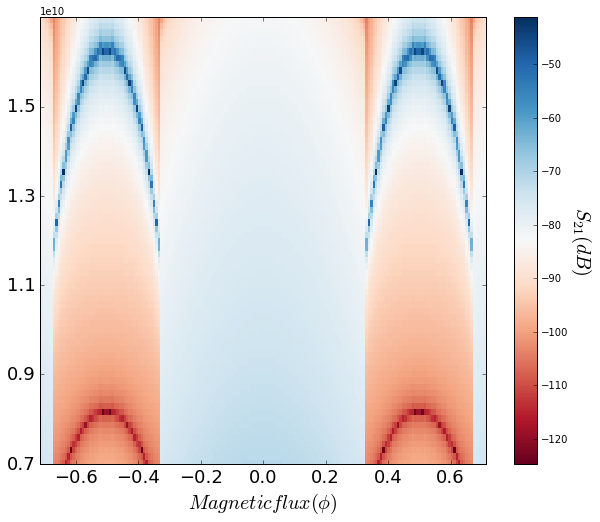

In [73]:
plt.figure()
#plt.pcolor(phi_range, omega/(2*np.pi), np.log10(np.abs(T))*10, cmap='RdBu', \
#           vmax=np.max(np.log10(np.abs(T)))-50, vmin=np.max(np.log10(np.abs(T)))-110); plt.colorbar()
#plt.ylim([7e9,17e9])
T_big = np.hstack((np.fliplr(T[:,:-1]), T))
T_big = np.hstack((np.fliplr(T_big[:,:-1]), T_big))
flux_range = np.linspace(-1, 1, T_big.shape[1])

fig, axes = plt.subplots(figsize=(10,8))
theory = plt.pcolor(flux_range, omega/(2*np.pi), np.log10(np.abs(T_big))*10, cmap='RdBu')
cb1 = fig.colorbar(theory, ax=axes)
axes.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
axes.set_ylim([9e9, 17e9])

plt.yticks(np.arange(7e9, 17e9, 2e9));

#new_tick_locations = np.array([.15, .5, .85])
axes.set_xlim(np.asarray([-0.5,0.5])/0.7)
#new_tick_labels = np.array([-0.5, 0, 0.5])
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_labels)
axes.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)


In [42]:
plt.figure()
plt.pcolor(phi_range, omega/(2*np.pi), wavelength); plt.colorbar()

C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(self.vmin)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:964: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(self.vmax)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:943: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(vmin)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:944: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(vmax)


C:\Users\ilia\Anaconda3\lib\site-packages\numpy\ma\core.py:3095: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:943: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(vmin)
C:\Users\ilia\Anaconda3\lib\site-packages\matplotlib\colors.py:944: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(vmax)


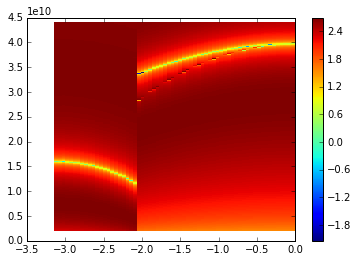

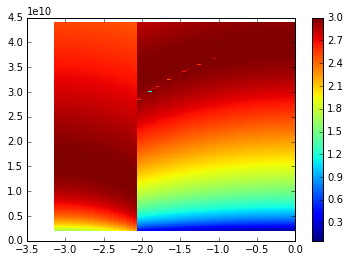

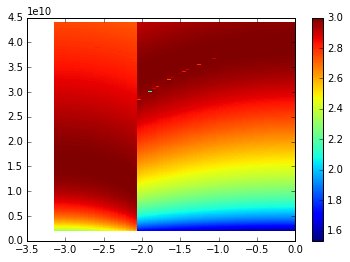

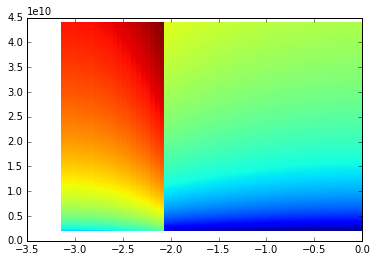

In [22]:
plt.pcolor(phi_range, omega/(2*np.pi), np.log10(np.abs(Z.imag))); plt.colorbar()
plt.figure()
plt.pcolor(phi_range, omega/(2*np.pi), np.log10(np.abs(Z.real))); plt.colorbar()
plt.figure()
plt.pcolor(phi_range, omega/(2*np.pi), np.log10(np.abs(Z))); plt.colorbar()
plt.figure()
plt.pcolor(phi_range, omega/(2*np.pi), np.log10(L_ind_nores))

In [21]:
plt.close()

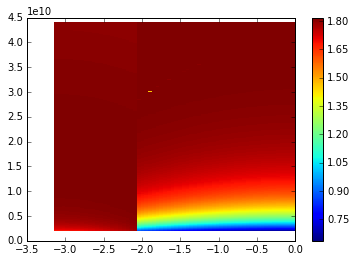

In [13]:
reflection = ((Z+50)-50)/((Z+50)+50)
transmission_plus_attenuation = (2*(Z+50))/((Z+50)+50)
voltage_on_qubit = (2*Z)/((Z+50)+50)
transmission = (2*50)/((Z+50)+50)

S21 = reflection
#print (Z)
plt.pcolor(phi_range, omega/(2*np.pi), np.abs(voltage_on_qubit)); plt.colorbar()

In [96]:
print(Ej)
print(Ec)
print(junction_capacitance*1.5)

38600000000.0
14906938314.807505
5.186340514171142e-15


In [97]:
%matplotlib inline
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies[:,27]-energies[:,0])

IndexError: index 27 is out of bounds for axis 1 with size 8

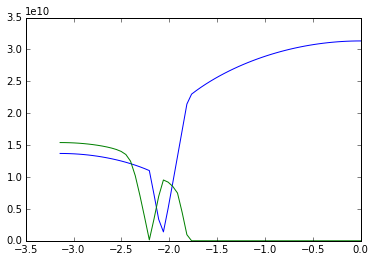

In [19]:
%matplotlib inline
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies[:,1]-energies[:,0])
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies[:,2]-energies[:,1])

#plt.plot(np.linspace(-np.pi, 0, flux_steps), energies[:,8]-energies[:,7])

In [ ]:
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies)

In [ ]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(8, 1)
phiy.create_grid(8, 1)
phiz.create_grid(8, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

#EjEc_ratio = 80
alpha = 0.72
#flux_steps = 3
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
Ec_steps = 11
energies = np.zeros((Ec_steps,4), dtype=np.float)
#Ej_range = josephson_energy/30*np.logspace(-0.1, 0.1, Ec_steps)*1.5
Ej_range = 38.5e9*np.logspace(-0.1, 0.1, Ec_steps)
Ec = 2*1.6e-19**2/junction_capacitance/(2*np.pi*1.054e-34)/1.5
#Ec_range = 2*1.6e-19**2/junction_capacitance/(2*np.pi*1.054e-34)*np.logspace(-0.1, 0.1, Ec_steps)

#for phie_id, phie_value in enumerate(np.linspace(-np.pi, np.pi, flux_steps)):
for Ec_id, Ej in enumerate(Ej_range):
    #Ej = 25e9
    phie_value = np.pi
    #Ec = 2*1.9e-19**2/2.83e-15/(2*np.pi*1.054e-34)
    FQ3JJ.find_element('JJA').set_critical_current(Ej)
    FQ3JJ.find_element('JJB').set_critical_current(Ej)
    FQ3JJ.find_element('JJD').set_critical_current(Ej)
    FQ3JJ.find_element('JJE').set_critical_current(Ej)
    FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
    FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
    FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
    FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
    FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[Ec_id, :] = eigenenergies
    print('Ej_id: {0}, Ej: {1:5.4g}, gap: {2:5.4g}'.format(Ec_id, Ej, eigenenergies[1]-eigenenergies[0]))

In [ ]:
plt.plot(Ec_range, energies[:,1]-energies[:,0])
2*1.6e-19**2/(2*np.pi*1.054e-34)/Ec_range

In [ ]:
Ej_range[19]

In [143]:
fo = open("C:/Documents/qubits/cats ears qubits/fitting.grd-tab", "r+")
#fo = open('/mnt/c/Documents/qubits/cats ears qubits/fitting.grd-tab', 'r+')
data=fo.read().split()
s21 = []
for y in range(1, 200001,1):
    s21.append(float(data[3*y-1]))
currents = np.arange (-10000e-6, 10000e-6, 80e-6)  #250
frequency = np.arange (6e9, 14e9, 1e7)  #800
s21 = np.reshape(s21, (800,250))

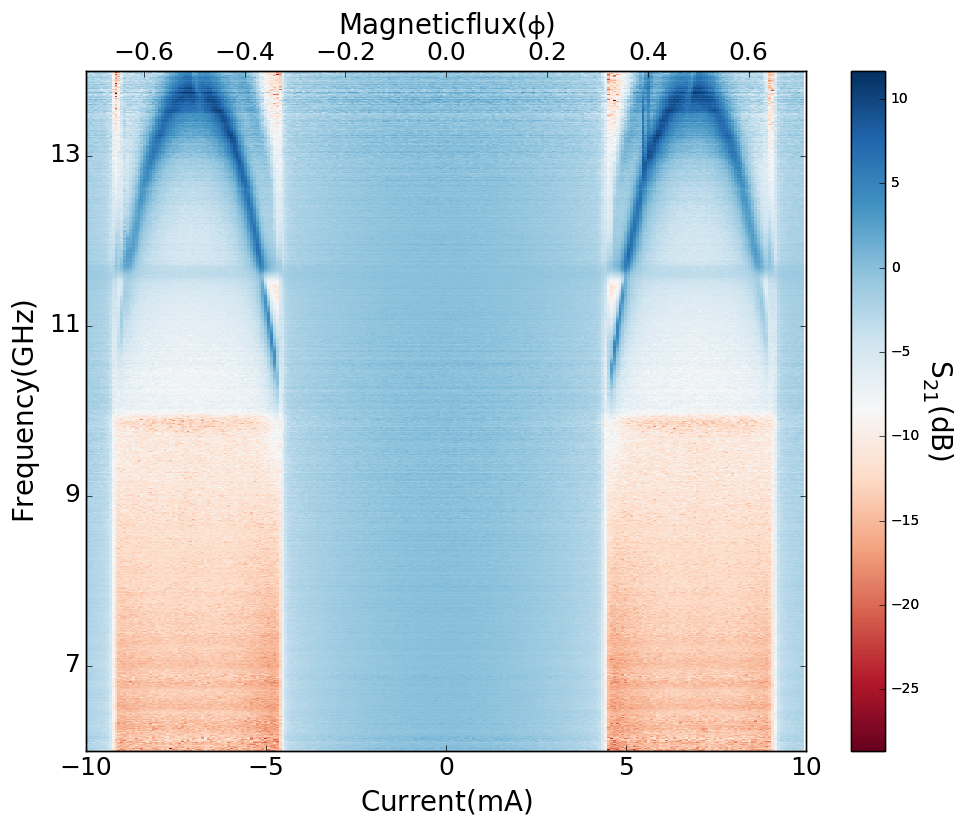

In [144]:
fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim([-10, 10])
axes.set_ylim([6, 14])

p = axes.pcolor(currents*1e3, frequency/1e9, s21, cmap=cm.RdBu)
#p2 = ax2.plot(phi_range/(2*np.pi), (energies[:,1]-energies[:,0])/1e9)
#p2 = ax2.plot(phi_range/(2*np.pi), (energies[:,2]-energies[:,1])/1e9)

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'$Current (mA)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

plt.yticks(range(7, 15, 2));

#new_tick_locations = np.array([.15, .5, .85])
ax2.set_xlim(np.asarray([-0.5,0.5])/0.7)
#new_tick_labels = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)


In [147]:
energies[:,1,:]

array([[  9.78143544e+10,   9.78145138e+10,   1.11906975e+11],
       [  9.78519736e+10,   9.78521344e+10,   1.11938064e+11],
       [  9.79647906e+10,   9.79649559e+10,   1.12031274e+11],
       [  9.81526842e+10,   9.81528573e+10,   1.12186435e+11],
       [  9.84154514e+10,   9.84156359e+10,   1.12403262e+11],
       [  9.87528067e+10,   9.87530072e+10,   1.12681347e+11],
       [  9.91643803e+10,   9.91646026e+10,   1.13020160e+11],
       [  9.96497164e+10,   9.96499678e+10,   1.13419033e+11],
       [  1.00208270e+11,   1.00208561e+11,   1.13877151e+11],
       [  1.00839404e+11,   1.00839747e+11,   1.14393528e+11],
       [  1.01542381e+11,   1.01542796e+11,   1.14966977e+11],
       [  1.02316363e+11,   1.02316879e+11,   1.15596057e+11],
       [  1.03160396e+11,   1.03161053e+11,   1.16278966e+11],
       [  1.04073397e+11,   1.04074262e+11,   1.17013354e+11],
       [  1.05054137e+11,   1.05055318e+11,   1.17795856e+11],
       [  1.06101206e+11,   1.06102884e+11,   1.1862083

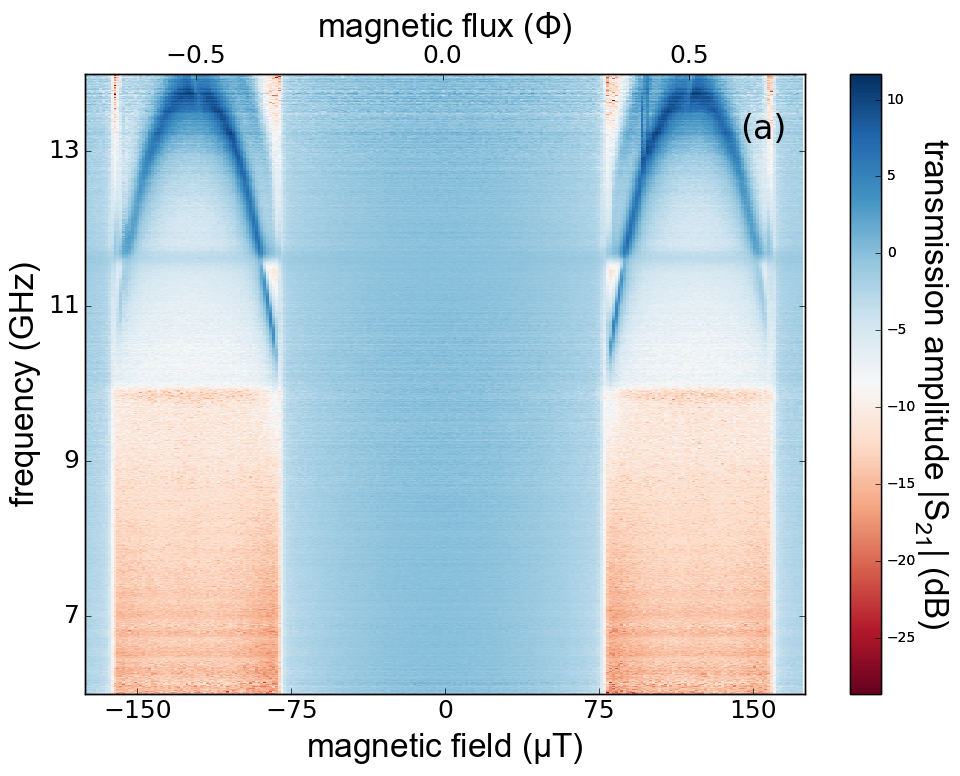

In [146]:
%matplotlib inline
#catsears = energies[:,1]-energies[:,0]
#catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = energies[:,1,:]
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])

half_flux_quantum_field = 2.0678e-15/(5.2e-6*3.1e-6)/1e-6

fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim(np.asarray([-10/8.5518*150, 10/8.5518*150]))
axes.set_ylim([6, 14])

phi_range_big = np.linspace(-3*np.pi, 5*np.pi, len(catsears))
p = axes.pcolor(currents*1e3/8.5518*150, frequency/1e9, s21, cmap=cm.RdBu, rasterized=True)
p2 = ax2.plot(phi_range_big/(2*np.pi), catsears/1e9, color='red', linewidth=3, rasterized=True)

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'magnetic field ($\mu$T)', fontsize=24, fontname='Arial')
axes.set_ylabel(r'frequency (GHz)', fontsize=24, fontname='Arial')

plt.yticks(range(7, 15, 2));



new_tick_locations2 = np.array([-0.5, 0, 0.5])
#ax2.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
#new_tick_labels2 = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

ax2.set_xticks(new_tick_locations2)
#ax2.set_xticklabels(new_tick_labels2)

#new_tick_locations = np.array([-8.5518, -4.2759, 0, 4.2759, 8.5518])
ax2.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
new_tick_locations = np.array([-150, -75, 0, 75, 150])
#axes.set_xlim(np.asarray([-0.5/half_flux_quantum_field,0.5/half_flux_quantum_field]))

axes.set_xticks(new_tick_locations)
#axes.set_xticklabels(new_tick_labels)

ax2.set_xlabel(r"magnetic flux ($\Phi$)", fontsize=24, fontname='Arial')
cb1.set_label('transmission amplitude |$S_{21}$| (dB)',  fontname='Arial', labelpad=25, rotation=270, fontsize=24)
matplotlib.pyplot.text(0.91, 0.91, '(a)', fontsize=24, verticalalignment='center', transform=axes.transAxes)

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/Documents/qubits/cats ears qubits/new_fit_nekomimi.pdf")


In [ ]:
catsears = energies[:,1]-energies[:,0]
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])

catsears12 = energies[:,2]-energies[:,1]
catsears12 = np.append(catsears12, np.flipud(catsears12)[1:])
catsears12 = np.append(catsears12, np.flipud(catsears12)[1:])
catsears12 = np.append(catsears12, np.flipud(catsears12)[1:])

catsears23 = energies[:,3]-energies[:,2]
catsears23 = np.append(catsears23, np.flipud(catsears23)[1:])
catsears23 = np.append(catsears23, np.flipud(catsears23)[1:])
catsears23 = np.append(catsears23, np.flipud(catsears23)[1:])

half_flux_quantum_field = 2.0678e-15/(5.2e-6*3.1e-6)/1e-6

fig, axes = plt.subplots(figsize=(10, 8))
#ax2 = axes.twiny()
#axes.set_xlim(np.asarray([-10/8.5518*150, 10/8.5518*150]))

#axes.set_ylim([6, 14])
axes.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))

phi_range_big = np.linspace(-3*np.pi, 5*np.pi, len(catsears))
#p = axes.pcolor(currents*1e3/8.5518*150, frequency/1e9, s21, cmap=cm.RdBu)
p2 = axes.plot(phi_range_big/(2*np.pi), catsears/1e9, color='red', linewidth=3)
p2 = axes.plot(phi_range_big/(2*np.pi), catsears12/1e9, color='blue', linewidth=3)
#p2 = axes.plot(phi_range_big/(2*np.pi), catsears23/1e9, color='green', linewidth=2)

cb1 = fig.colorbar(p, ax=axes)
#cb1.ax.set_visible(False)
#cb1 = matplotlib.colorbar.make_axes(parents=axes)
#cb2 = fig.colorbar(p, ax=ax2, visible=False)

#axes[0].axis('tight')
#axes.set_xlabel(r'magnetic field ($\mu$T)', fontsize=24, fontname='Arial')
axes.set_ylabel(r'frequency (GHz)', fontsize=24, fontname='Arial')

#plt.yticks(range(7, 15, 2));



new_tick_locations2 = np.array([-0.5, 0, 0.5])
#new_tick_labels2 = np.array([-0.5, 0, 0.5])
#ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

axes.set_xticks(new_tick_locations2)
#ax2.set_xticklabels(new_tick_labels2)

#new_tick_locations = np.array([-8.5518, -4.2759, 0, 4.2759, 8.5518])
#axes.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
#new_tick_locations = np.array([-150, -75, 0, 75, 150])
#axes.set_xlim(np.asarray([-0.5/half_flux_quantum_field,0.5/half_flux_quantum_field]))

#axes.set_xticks(new_tick_locations)
#axes.set_xticklabels(new_tick_labels)

axes.set_xlabel(r"magnetic flux ($\Phi$)", fontsize=24, fontname='Arial')
cb1.set_label('transmission amplitude |$S_{21}$| (dB)',  fontname='Arial', labelpad=25, rotation=270, fontsize=24)
matplotlib.pyplot.text(0.91, 0.91, '(b)', fontsize=24, verticalalignment='center', transform=axes.transAxes)
plt.gcf().set_size_inches(10,8)
plt.savefig("C:/Documents/qubits/cats ears qubits/0-1_and_1-2_transitions.pdf")


In [ ]:
print(phi_range_big)
print(catsears)

In [ ]:
print(FQ3JJ.capacitance_matrix())